In [1]:
%matplotlib inline

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np

from firesong.FluxPDF import flux_pdf
from firesong.Firesong import firesong_simulation

mpl.style.use('./firesong_style.mplstyle')

## FluxPDF
When simulating very large densities, it is cumbersome to look at the specifics of each source. However, it is still possible to extract some of the most important distributions from an observational perspective: for example, the $\log(N) - \log(S)$ which describes the number of sources as a function of the flux on Earth

First, we show how the two approaches – `Firesong.py` and `FluxPDF.py` – recover the same results for the same sets of physics parameters

In [3]:
min_log_flux = -20.
max_log_flux = 5.
nbins = 200

firesong_res = firesong_simulation(None, filename=None, 
                                   density=1e-9,
                                   Evolution='MD2014SFR',
                                   verbose=False)

flux_res = flux_pdf(None, filename=None,
                   density=1e-9, 
                   logFMin=min_log_flux,
                   logFMax=max_log_flux,
                   nFluxBins=nbins,
                   Evolution='MD2014SFR',
                   verbose=False)

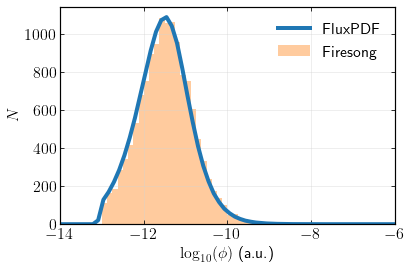

In [4]:
fig, ax = plt.subplots()

plt.plot(flux_res[0], flux_res[1], lw=4., ls='-', 
         label="FluxPDF")
plt.hist(np.log10(firesong_res['sources']['flux']), 
         bins=np.linspace(min_log_flux, max_log_flux, nbins + 1),
         label='Firesong', histtype='stepfilled', alpha=0.4)

plt.xlabel(r'$\log_{10}(\phi)$ (a.u.)')
plt.ylabel(r'$N$')
plt.xlim(-14., -6.)
plt.legend(loc=1, frameon=False)
fig.set_facecolor('w')
plt.show()

### Large density $\log(N) - \log(S)$

We now show the $\log(N) - \log(S)$ distributions that we get for a variety of densities, including large densities that would induce too large a memory requirement if using `Firesong`

In [5]:
min_log_flux = -20.
max_log_flux = 5.
nbins = 150

low_density = 1e-10
med_density = 1e-7
high_density = 1e-4

pdf_dict = dict()

for density in [low_density, med_density, high_density]:
    pdf_dict[density] = flux_pdf(None, filename=None,
                                   density=density, 
                                   logFMin=min_log_flux,
                                   logFMax=max_log_flux,
                                   nFluxBins=nbins,
                                   Evolution='MD2014SFR',
                                   verbose=False)

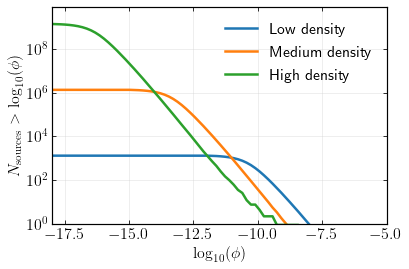

In [6]:
for density, label in [(low_density, 'Low density'), 
                       (med_density, 'Medium density'), 
                       (high_density, 'High density')]:
    plt.plot(pdf_dict[density][0], np.cumsum(pdf_dict[density][1][::-1])[::-1],
            label = label)
    
plt.xlabel(r'$\log_{10}(\phi)$')
plt.ylabel(r'$N_{\mathrm{sources}} > \log_{10}(\phi)$')
plt.yscale('log')
plt.legend(loc=1, frameon=False)
plt.ylim(1e0, plt.ylim()[1])
plt.xlim(-18, -5)
plt.show()

This plot shows the number of sources above a given flux threshold for three different densities, calculated by integrating the results from a `FluxPDF`

Just as in `Firesong.py`, you can pass a variety of arguments to `FluxPDF`, including:
* `Evolution`
* `Luminosity`
* density
* Transient vs. steady sources (transient sources have an associated `timescale`)

This list is not exhaustive. Please see the [API documentation](https://icecube.github.io/FIRESONG/) for the complete list of arguments